In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("ToyotaCorolla - MLR.csv")
#first 5rows
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [450]:
#displays rows and columns
df.shape      

(1436, 11)

In [451]:
# Check data types
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [452]:
#displays columns names
df.columns        

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [453]:
# data types & non-null counts
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [454]:
#Check Missing Values
df.isnull().sum()

#Output:There is No null values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [455]:
#Check Duplicate Rows
df.duplicated().sum()

np.int64(1)

In [456]:
#Drop duplicates
df = df.drop_duplicates()

In [457]:
#Rechecks whether duplicates is removed or not
df.duplicated().sum()

#output: Count is 0(duplicates removed)

np.int64(0)

In [458]:
#It performs descriptive statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


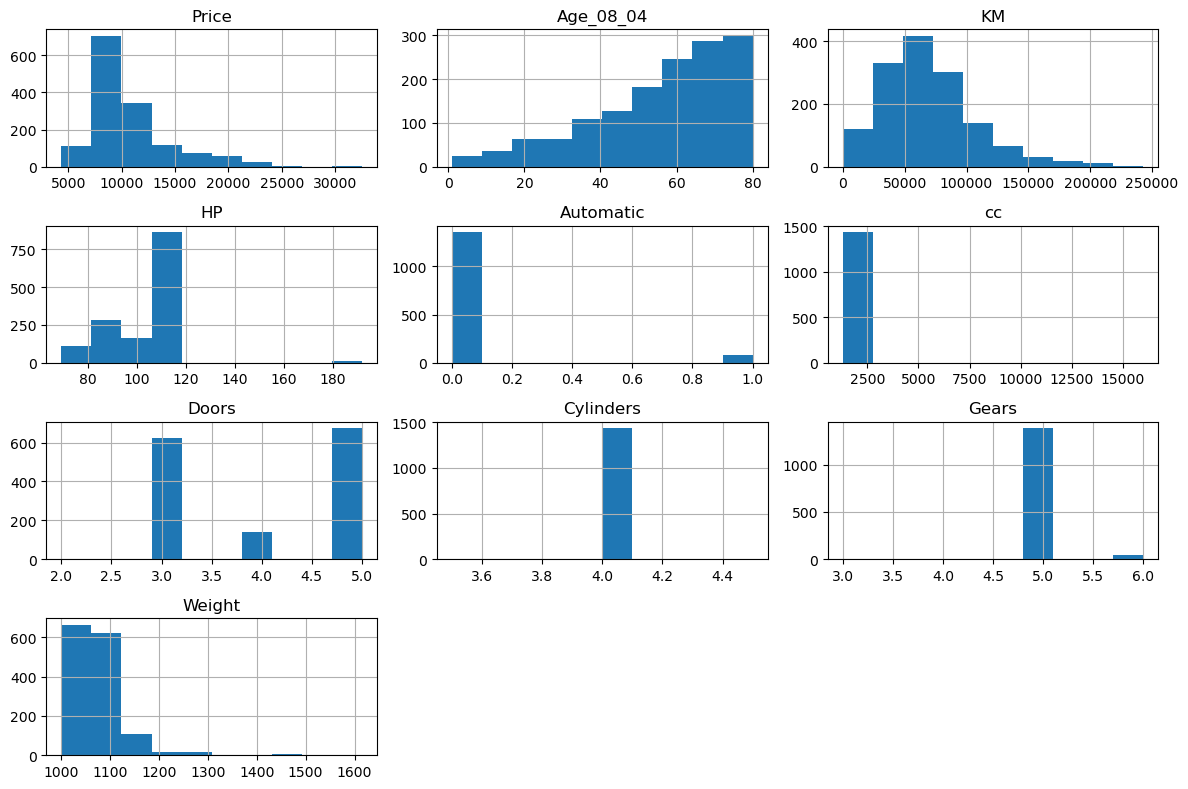

In [459]:
#Histogram for skewness (Numerical data)
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


In [460]:
#Categorical data informations
df.describe(include='object')

,Fuel_Type
count,1435
unique,3
top,Petrol
freq,1264


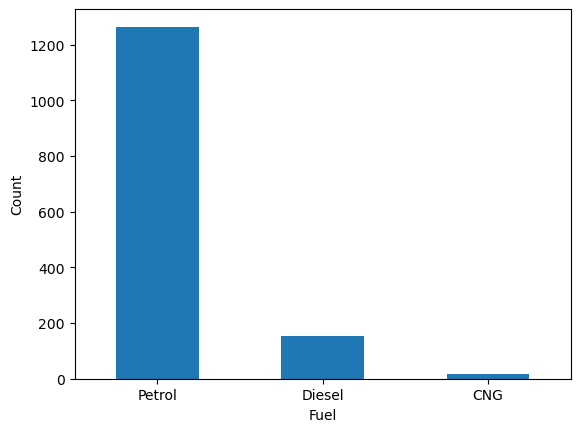

In [461]:
#Bargraph for Categorical variable
df['Fuel_Type'].value_counts().plot(kind='bar')
plt.xlabel("Fuel")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

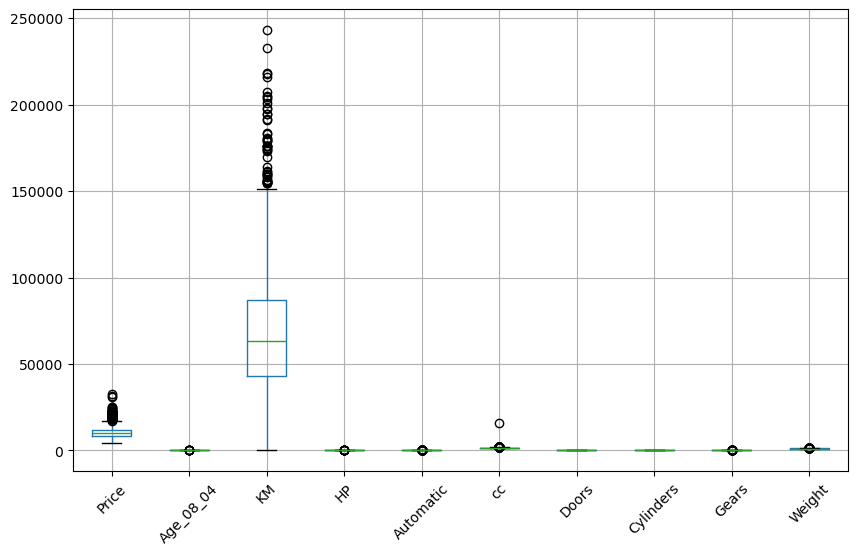

In [463]:
#Boxplot (Outliers Detection)
plt.figure(figsize=(10,6))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [464]:
df_numeric = df.select_dtypes(include= 'number')
df_categorical = df.select_dtypes(include= 'object')

In [465]:
#Treat outlier
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
IQR_df = pd.DataFrame({
    "Q1": Q1,
    "Q3":Q3,
    "IQR":IQR})
IQR_df

,Q1,Q3,IQR
Price,8450.0,11950.0,3500.0
Age_08_04,44.0,70.0,26.0
KM,43000.0,87041.5,44041.5
HP,90.0,110.0,20.0
Automatic,0.0,0.0,0.0
cc,1400.0,1600.0,200.0
Doors,3.0,5.0,2.0
Cylinders,4.0,4.0,0.0
Gears,5.0,5.0,0.0
Weight,1040.0,1085.0,45.0


In [466]:
#Find no of outliers
outliers_before = ((df_numeric < (Q1 - 1.5 * IQR)) | 
                   (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

print("No of Outlier before:",outliers_before.sum())

#337 outliers is present ,so removing outliers is not good,we need to replace the outliers with respective limits.

No of Outlier before: 337


In [467]:
#Replace outliers with their upper or lower limit
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replaces outliers by capping values within the calculated lower and upper bounds for each column
df_numeric = df_numeric.clip(lower=lower_bound, upper=upper_bound, axis=1) 

In [468]:
#Checking outliers is correctly replaced or not by sum of all outliers.
outliers_after = ((df_numeric < (Q1 - 1.5 * IQR)) | 
                   (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

print("No of Outlier after:",outliers_after.sum()) #zero outliers indicates correctly replaced values 


No of Outlier after: 0


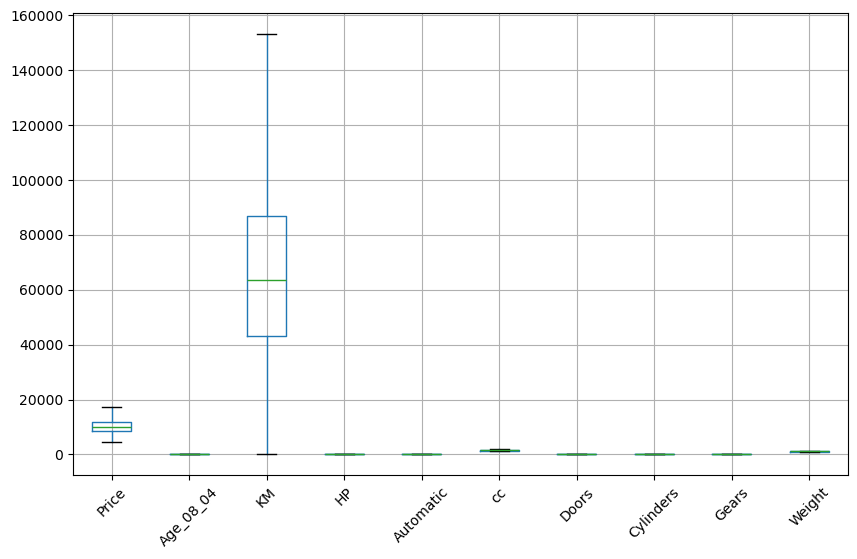

In [469]:
#Boxplot (Representing no outliers)
plt.figure(figsize=(10,6))
df_numeric.boxplot()
plt.xticks(rotation=45)
plt.show()

In [470]:
#Create Dummy Variables for categorical columns and drop last columns to avoid Avoid Dummy Variable Trap(multicollinearity issue)
df_dummies= pd.get_dummies(df_categorical, columns=['Fuel_Type'],drop_first = True)
df_dummies       


,Fuel_Type_Diesel,Fuel_Type_Petrol
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1431,False,True
1432,False,True
1433,False,True
1434,False,True


In [471]:
final_data = pd.concat([df_numeric,df_dummies],axis=1)
final_data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986.0,90,0,1900,3,4,5,1152.5,True,False
1,13750,23,72937.0,90,0,1900,3,4,5,1152.5,True,False
2,13950,24,41711.0,90,0,1900,3,4,5,1152.5,True,False
3,14950,26,48000.0,90,0,1900,3,4,5,1152.5,True,False
4,13750,30,38500.0,90,0,1900,3,4,5,1152.5,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,0,1300,3,4,5,1025.0,False,True
1432,10845,72,19000.0,86,0,1300,3,4,5,1015.0,False,True
1433,8500,71,17016.0,86,0,1300,3,4,5,1015.0,False,True
1434,7250,70,16916.0,86,0,1300,3,4,5,1015.0,False,True


In [472]:
#Finding unique columns
final_data.nunique()

Price                190
Age_08_04             75
KM                  1216
HP                    12
Automatic              1
cc                     9
Doors                  4
Cylinders              1
Gears                  1
Weight                41
Fuel_Type_Diesel       2
Fuel_Type_Petrol       2
dtype: int64

In [473]:
#Droping these columns because no correlation is exists
final_data = final_data.drop(['Automatic', 'Cylinders', 'Gears'], axis=1)

In [474]:
corr = final_data.corr()['Price'].sort_values(ascending=False)
print(corr)


Price               1.000000
Weight              0.507823
HP                  0.254427
Doors               0.183010
cc                  0.129352
Fuel_Type_Petrol    0.014712
Fuel_Type_Diesel   -0.001579
KM                 -0.607949
Age_08_04          -0.895340
Name: Price, dtype: float64


In [475]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [476]:
Y = final_data["Price"]

In [477]:
# Model-1--------->Age, Weight & Petrol
X1 = final_data[["Age_08_04","Weight","Fuel_Type_Petrol"]]

#Train–Test Split (80–20)
X1_train, X1_test, Y_train, Y_test = train_test_split( X1, Y, test_size=0.2,random_state=42)

#Fitting Model
model_1 = LinearRegression()

#Model learns coefficients for each X variable
model_1.fit(X1_train,Y_train)

Predict_1 = model_1.predict(X1_train)

#Finding errors
rmse =np.round(root_mean_squared_error(Y_train,Predict_1),2)

r2score = np.round(r2_score(Y_train,Predict_1),2)

print("RMSE:",rmse)
print("R-Square score:",r2score)
print("\nTrain Score:",np.round(model_1.score(X1_train,Y_train),2))
print("Test Score:",np.round(model_1.score(X1_test,Y_test),2))

RMSE: 1165.32
R-Square score: 0.85

Train Score: 0.85
Test Score: 0.84


In [478]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Lasso and Ridge regression improve model accuracy by reducing overfitting through coefficient regularization.

scaler = StandardScaler()  
# Creates a scaler to standardize features to mean 0 and standard deviation 1

X_train_scaled = scaler.fit_transform(X1_train)  
# Fits the scaler on training data and transforms it to standardized form

X_test_scaled = scaler.transform(X1_test)  
# Transforms test data using the same scaling parameters to avoid data leakage

ridge = Ridge(alpha=1.0)  
# Initializes Ridge regression with regularization strength alpha = 1.0

ridge.fit(X_train_scaled, Y_train)  
# Trains the Ridge regression model using scaled training data

y_pred_ridge_1 = ridge.predict(X_test_scaled)  
# Predicts target values for the test dataset

print("Ridge R²:", np.round(r2_score(Y_test, y_pred_ridge_1),2))  
# Calculates and prints the R² score rounded to two decimals to evaluate model performance


Ridge R²: 0.84


In [ ]:
Interpretation for Model 1:
    *The model is accurate, stable, and well-regularized.
    *Age and Weight are strong predictors of price.
    *Ridge regression successfully controls overfitting, as shown by similar train and test scores.
    *The model is suitable for real-world price prediction.

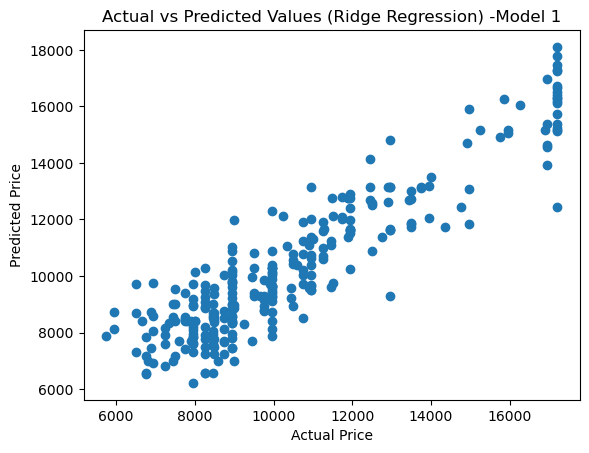

In [479]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(Y_test, y_pred_ridge_1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Values (Ridge Regression) -Model 1")
plt.show()


In [480]:
# Model-2--------->Age, KM, Weight,Petrol
X2 = final_data[["Age_08_04","KM","Weight","Fuel_Type_Petrol"]]

#Train–Test Split (80–20)
X2_train, X2_test, Y_train, Y_test = train_test_split( X2, Y, test_size=0.2,random_state=42)

#Fitting Model
model_2 = LinearRegression()

#Model learns coefficients for each X variable
model_2.fit(X2_train,Y_train)

Predict_2 = model_2.predict(X2_train)

#Finding errors
rmse =np.round(root_mean_squared_error(Y_train,Predict_2),2)

r2score = np.round(r2_score(Y_train,Predict_2),1)

print("RMSE:",rmse)
print("R-Square score:",r2score)
print("\nTrain Score:",np.round(model_3.score(X3_train,Y_train),2))
print("Test Score:",np.round(model_3.score(X3_test,Y_test),2))

RMSE: 1098.39
R-Square score: 0.9

Train Score: 0.85
Test Score: 0.85


In [481]:
#Lasso and Ridge regression improve model accuracy by reducing overfitting through coefficient regularization.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X2_train)
X_test_scaled = scaler.transform(X2_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)

y_pred_ridge_2 = ridge.predict(X_test_scaled)
print("Ridge R²:", np.round(r2_score(Y_test, y_pred_ridge_2),2))


Ridge R²: 0.85


In [ ]:
Interpretation for Model 2:
     *X Variables used are Age_08_04, KM, Weight & Fuel_Type_Petrol
     *FuelType_Petrol is a dummy variable: 1 = Petrol, 0 = CNG baseline
     *By keeping 4 variables we get a 1098.39 rmse value and 0.9 R Square value.
     *R-Square value is greater than 0.9 is considered to be excellent model for predicting
     *Train score and test score are equal.There is no diference between them.So our model_1 predicting is best.
     *RMSE is an error occured between model predicted value and original value
     *R-Square is used to make decision on variables selection and gives values between 0 to 1.

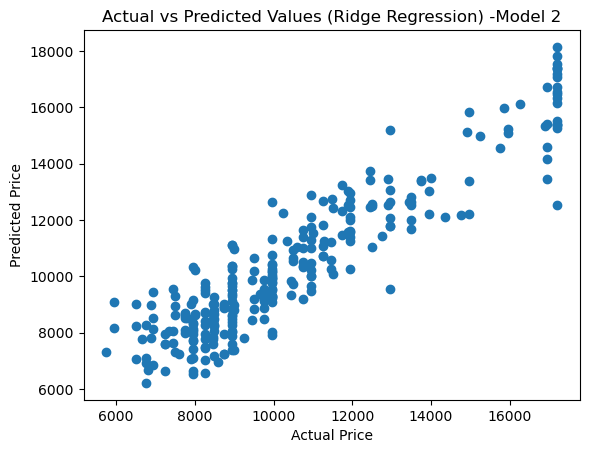

In [482]:
#Scatter Plot
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(Y_test, y_pred_ridge_2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Values (Ridge Regression) -Model 2")
plt.show()


In [483]:
# Model-3--------->Age, KM, Weight
X3 = final_data[["Age_08_04","KM","Weight"]]

#Train–Test Split (80–20)
X3_train, X3_test, Y_train, Y_test = train_test_split( X3, Y, test_size=0.2,random_state=42)

#Fitting Model
model_3 = LinearRegression()

#Model learns coefficients for each X variable
model_3.fit(X3_train,Y_train)

Predict_3 = model_3.predict(X3_train)

#Finding errors
rmse =np.round(root_mean_squared_error(Y_train,Predict_3),2)

r2score = np.round(r2_score(Y_train,Predict_3),2)

print("RMSE:",rmse)
print("R-Square score:",r2score)
print("\nTrain Score:",np.round(model_2.score(X2_train,Y_train),2))
print("Test Score:",np.round(model_2.score(X2_test,Y_test),2))

RMSE: 1152.7
R-Square score: 0.85

Train Score: 0.87
Test Score: 0.85


In [484]:
#Lasso and Ridge regression improve model accuracy by reducing overfitting through coefficient regularization.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X3_train)
X_test_scaled = scaler.transform(X3_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)

y_pred_ridge_3 = ridge.predict(X_test_scaled)
print("Ridge R²:", np.round(r2_score(Y_test, y_pred_ridge_3),2))


Ridge R²: 0.85


In [ ]:
Interpretation for Model 3:
   *X Variables are age,KM & weight
   *Intercept:Base price when Age, KM, and Weight are zero (theoretical).
   *Age: For every 1-year increase, price decreases, holding other factors constant.
   *KM: More kilometers driven reduces price.
   *Weight: Heavier cars generally have higher prices
   *R-Square value is greater than 8 is considered to be a good model.
   *Then Train score and Test score are nearly close to each other.So training given for 80% of  train data is predicting the output on test data 
is approximately equal and correct output predicting.

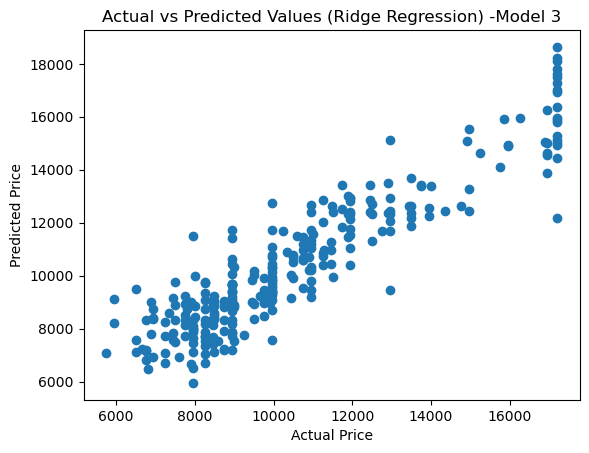

In [485]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(Y_test, y_pred_ridge_3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Values (Ridge Regression) -Model 3")
plt.show()


In [ ]:
............Interview Questions...........

In [ ]:
1.What is Normalization & Standardization and how is it helpful?
          Normalization and standardization scale features to improve model performance, stability, and convergence.

Normalization:
  Normalization rescales data to a fixed range, usually 0 to 1.
      
How it is helpful:
 *Ensures all features are on the same scale
 *Prevents features with large values from dominating the model
 *Improves performance of distance-based algorithms (KNN, K-Means)

Standardization:
  Standardization rescales data to have mean = 0 and standard deviation = 1.

How it is helpful:
  *Makes features comparable
  *Handles outliers better than normalization
  *Required for Lasso and Ridge regression
  *Improves numerical stability in linear models and SVM

In [ ]:
2.What techniques can be used to address multicollinearity in Multiple Linear Regression?
      *Multicollinearity can be handled using VIF analysis, Ridge/Lasso regression and analysis correlation.
      *Multicollinearity in multiple linear regression can be addressed by identifying and removing highly correlated predictors using 
correlation analysis or Variance Inflation Factor (VIF).
      *Regularization techniques such as Ridge regression reduce coefficient instability, while Lasso regression performs feature selection by 
shrinking some coefficients to zero. 
      *Principal Component Analysis (PCA) can also be used to transform correlated variables into uncorrelated components when prediction 
is the primary goal.